#
Create a plot below of how  𝑅2  varies across different values of  𝜆  for ridge and lasso regression. Use logic and code similar to the ridge regression demonstration above, and base your plot on the X_train2 feature set.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')


In [2]:
# Load the data. Keep air quality data, drop the index column
# and any missing data columns.
df = pd.read_csv(
    'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/credit-card-defaults.csv'
).iloc[:,1:].dropna()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 4 columns):
default    10000 non-null object
student    10000 non-null object
balance    10000 non-null float64
income     10000 non-null float64
dtypes: float64(2), object(2)
memory usage: 390.6+ KB


C:\Users\Vadim\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


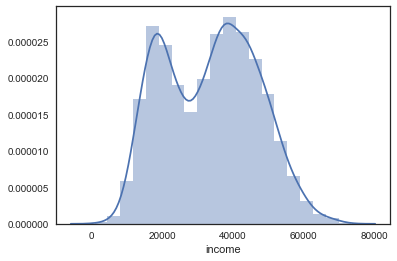

In [4]:
sns.distplot(df['income'], bins=20)

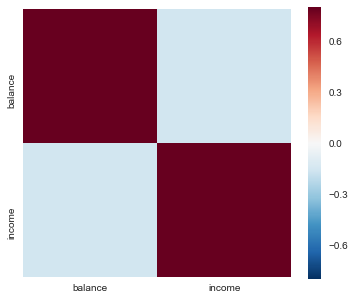

In [5]:
corrmat = df.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [6]:
df.head(5)

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [7]:
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

C:\Users\Vadim\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
default    10000 non-null float64
student    10000 non-null float64
balance    10000 non-null float64
income     10000 non-null float64
dtypes: float64(4)
memory usage: 312.6 KB


In [9]:
df.head(5)

,default,student,balance,income
0,-0.185599,-0.645936,-0.218835,0.813187
1,-0.185599,1.548141,-0.037616,-1.605496
2,-0.185599,-0.645936,0.492410,-0.131212
3,-0.185599,-0.645936,-0.632893,0.164031
4,-0.185599,-0.645936,-0.102791,0.370915


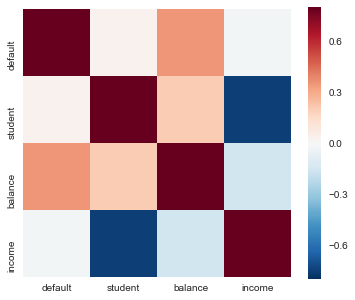

In [10]:
corrmat = df.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [11]:
df.skew(axis = 0, skipna = True) 


default    5.203134
student    0.902340
balance    0.246065
income     0.073341
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A14649E748>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001A146ABD208>]], dtype=object)

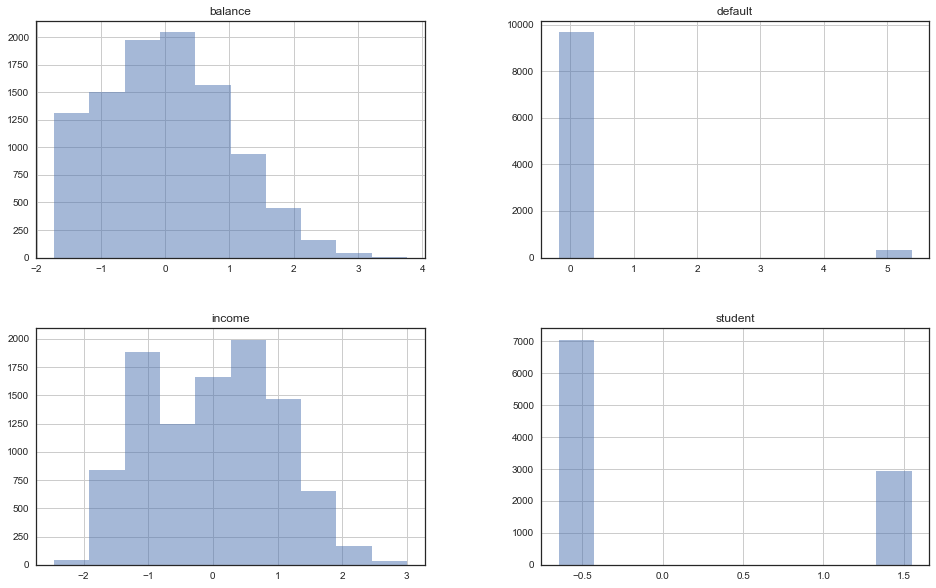

In [12]:
df.hist(alpha=0.5, figsize=(16, 10))

In [13]:
# WE will have several dataframes: one with the simple features and the other with the additional
# engineered fatures. 

In [21]:
# Define the SIMPLE training and test sizes.

Y = df['income'].values.reshape(-1, 1)
X1 = df.loc[:, ~(df.columns).isin(['income'])]
print(X1.shape)
print(Y.shape)

(10000, 9)
(10000, 1)


In [15]:
# define second dataset with engineered features:multiply, sqrt, 2 and 3 power 

# Make some new features to capture potential quadratic and cubic
# relationships between solar radiation and day or temperature.
df['balance_student'] = df['balance'] * df['student']
df['balance_default'] = df['balance'] * df['default']
df['student_default'] = df['student'] * df['default']
df['balance_sqrt'] = (df['balance'] + 100) ** .5
df['balance2'] = (df['balance'] + 100) ** 2
df['balance3'] = (df['balance'] + 100) ** 3

X2 = df.loc[:, ~(df.columns).isin(['income'])]

In [16]:
X2.head(5)

,default,student,balance,balance_student,balance_default,student_default,balance_sqrt,balance2,balance3
0,-0.185599,-0.645936,-0.218835,0.141353,0.040616,0.119885,9.989052,9956.280924,9.934493e+05
1,-0.185599,1.548141,-0.037616,-0.058235,0.006981,-0.287334,9.998119,9992.478229,9.988719e+05
2,-0.185599,-0.645936,0.492410,-0.318066,-0.091391,0.119885,10.024590,10098.724506,1.014845e+06
3,-0.185599,-0.645936,-0.632893,0.408808,0.117464,0.119885,9.968305,9873.822052,9.811331e+05
4,-0.185599,-0.645936,-0.102791,0.066396,0.019078,0.119885,9.994859,9979.452390,9.969194e+05


In [17]:
# split x and y 
from sklearn.model_selection import train_test_split

X2_train, X2_valid, y_train, y_valid = train_test_split(X2, Y, test_size=0.2, random_state=10)

In [18]:
def LinearLassoModel(X,Y,alphaV ):
    # estimate 
    X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.2, random_state=10)
    lr = linear_model.Lasso(alpha=alphaV)
    #fit
    lr.fit(X_train, y_train)
    #? predict
    ls_t_score= lr.score(X_train, y_train)
    trained=(ls_t_score,lr.coef_, lr.intercept_)
    #
    #valid
    ls_v_score=lr.score(X_valid, y_valid)
    validated=(ls_v_score,lr.coef_, lr.intercept_)
    
    return (trained, validated)

In [33]:
# higher the alpha value, more restriction on the coefficients; 
#low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
alf=0.35
trained, validated  =LinearLassoModel(X1,Y, alphaV=alf)

print("Train R2 : " + str(trained[0]) + " Coef : " + str( trained[1] ) +  "  Itercept : " + str (trained[2]))
print("Validated R2 :" + str(validated[0])+ " Coef : " + str(validated[1]) +" Itercept : " + str (validated[2]))

Train R2 : 0.442634506269 Coef : [  0.00000000e+00  -3.90409328e-01  -0.00000000e+00  -0.00000000e+00
   0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -2.87086589e-04
  -5.12693302e-07]  Itercept : [ 3.38097167]
Validated R2 :0.436810031168 Coef : [  0.00000000e+00  -3.90409328e-01  -0.00000000e+00  -0.00000000e+00
   0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -2.87086589e-04
  -5.12693302e-07] Itercept : [ 3.38097167]


In [36]:
alf=0.55
trained, validated  =LinearLassoModel(X1,Y, alphaV=alf)
print ("alpha : " + str(alf))
print("Train R2 : " + str(trained[0]) + " Coef : " + str( trained[1] ) +  "  Itercept : " + str (trained[2]))
print("Validated R2 :" + str(validated[0])+ " Coef : " + str(validated[1]) +" Itercept : " + str (validated[2]))

alpha : 0.55
Train R2 : 0.256319904547 Coef : [  0.00000000e+00  -1.82651515e-01  -0.00000000e+00  -0.00000000e+00
   0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -1.77201552e-04
  -2.70006507e-06]  Itercept : [ 4.4686441]
Validated R2 :0.250375099173 Coef : [  0.00000000e+00  -1.82651515e-01  -0.00000000e+00  -0.00000000e+00
   0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -1.77201552e-04
  -2.70006507e-06] Itercept : [ 4.4686441]


In [37]:
alf=0.75
trained, validated  =LinearLassoModel(X1,Y, alphaV=alf)
#res=[i for i in  trained[1] if i > 0]
print("")
print ("alpha : " + str(alf))
print("Train R2 : " + str(trained[0]) + " Coef : " + str( trained[1] ) +  "  Itercept : " + str (trained[2]))
print("Validated R2 :" + str(validated[0])+ " Coef : " + str(validated[1]) +" Itercept : " + str (validated[2]))

alpha : 0.75
Train R2 : 0.0241193812109 Coef : [  0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00
   0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00
  -5.15957237e-06]  Itercept : [ 5.15547017]
Validated R2 :0.0182291150982 Coef : [  0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00
   0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00
  -5.15957237e-06] Itercept : [ 5.15547017]
